In [33]:
# Import de librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
import xgboost as xgb

# Obtención de los datos

## Infomación de los datos

In [3]:
# Importado de los datos al dataframe 
df = pd.read_excel('./datasets/dataset.xlsx', sheet_name='method')
df.head()

,Project,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,...,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs,Buggy
0,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.ClientTimeoutTest.testTim...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
1,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.connection.nio.ClientConn...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.connection.nio.ClientConn...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.connection.nio.ClientConn...,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
4,hazelcast,0004065723dbb3f0219d5fde78068a98bfa22c1c,com.hazelcast.client.spi.impl.ClusterListenerT...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [42]:
# df.info()

In [5]:
# Comprobación de datos Null 
print('Valores Null: ',df.isnull().sum().sum())

Valores Null:  0


In [41]:
# df.describe()

In [40]:
# df['Buggy'].value_counts

## Duplicados y no relevantes

In [9]:
# Comprobación de filas duplicadas 
print('Filas duplicadas: ', df.duplicated().sum())
# Eliminación de las filas duplicadas
df = df.drop_duplicates()
# Comprobación de la eliminaciñon correcta de las filas duplicadas eliminadas
print( 'duplicated Values: ', df.duplicated().sum())

duplicated Values:  0


In [10]:
# Eliminación de columnas no apropiadas para el entrenamiento de los modelos
df = df.drop(['Project', 'Hash', 'LongName','Number of Bugs'], axis=1)
# Comprobación de los cambios realizados
df.head()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Buggy
0,0,0,0,0,0,0,0,0,148093,163636,...,0,0,0,0,0,0,1,1,0,1
1,0,0,0,0,0,0,0,0,212183,248,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,299316,36,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,349426,4386,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,0,0,0,0,0,513541,536364,...,0,0,0,0,0,0,1,0,0,1


In [12]:
# Cantidad de datos tras el tratado
df.shape

(108001, 73)

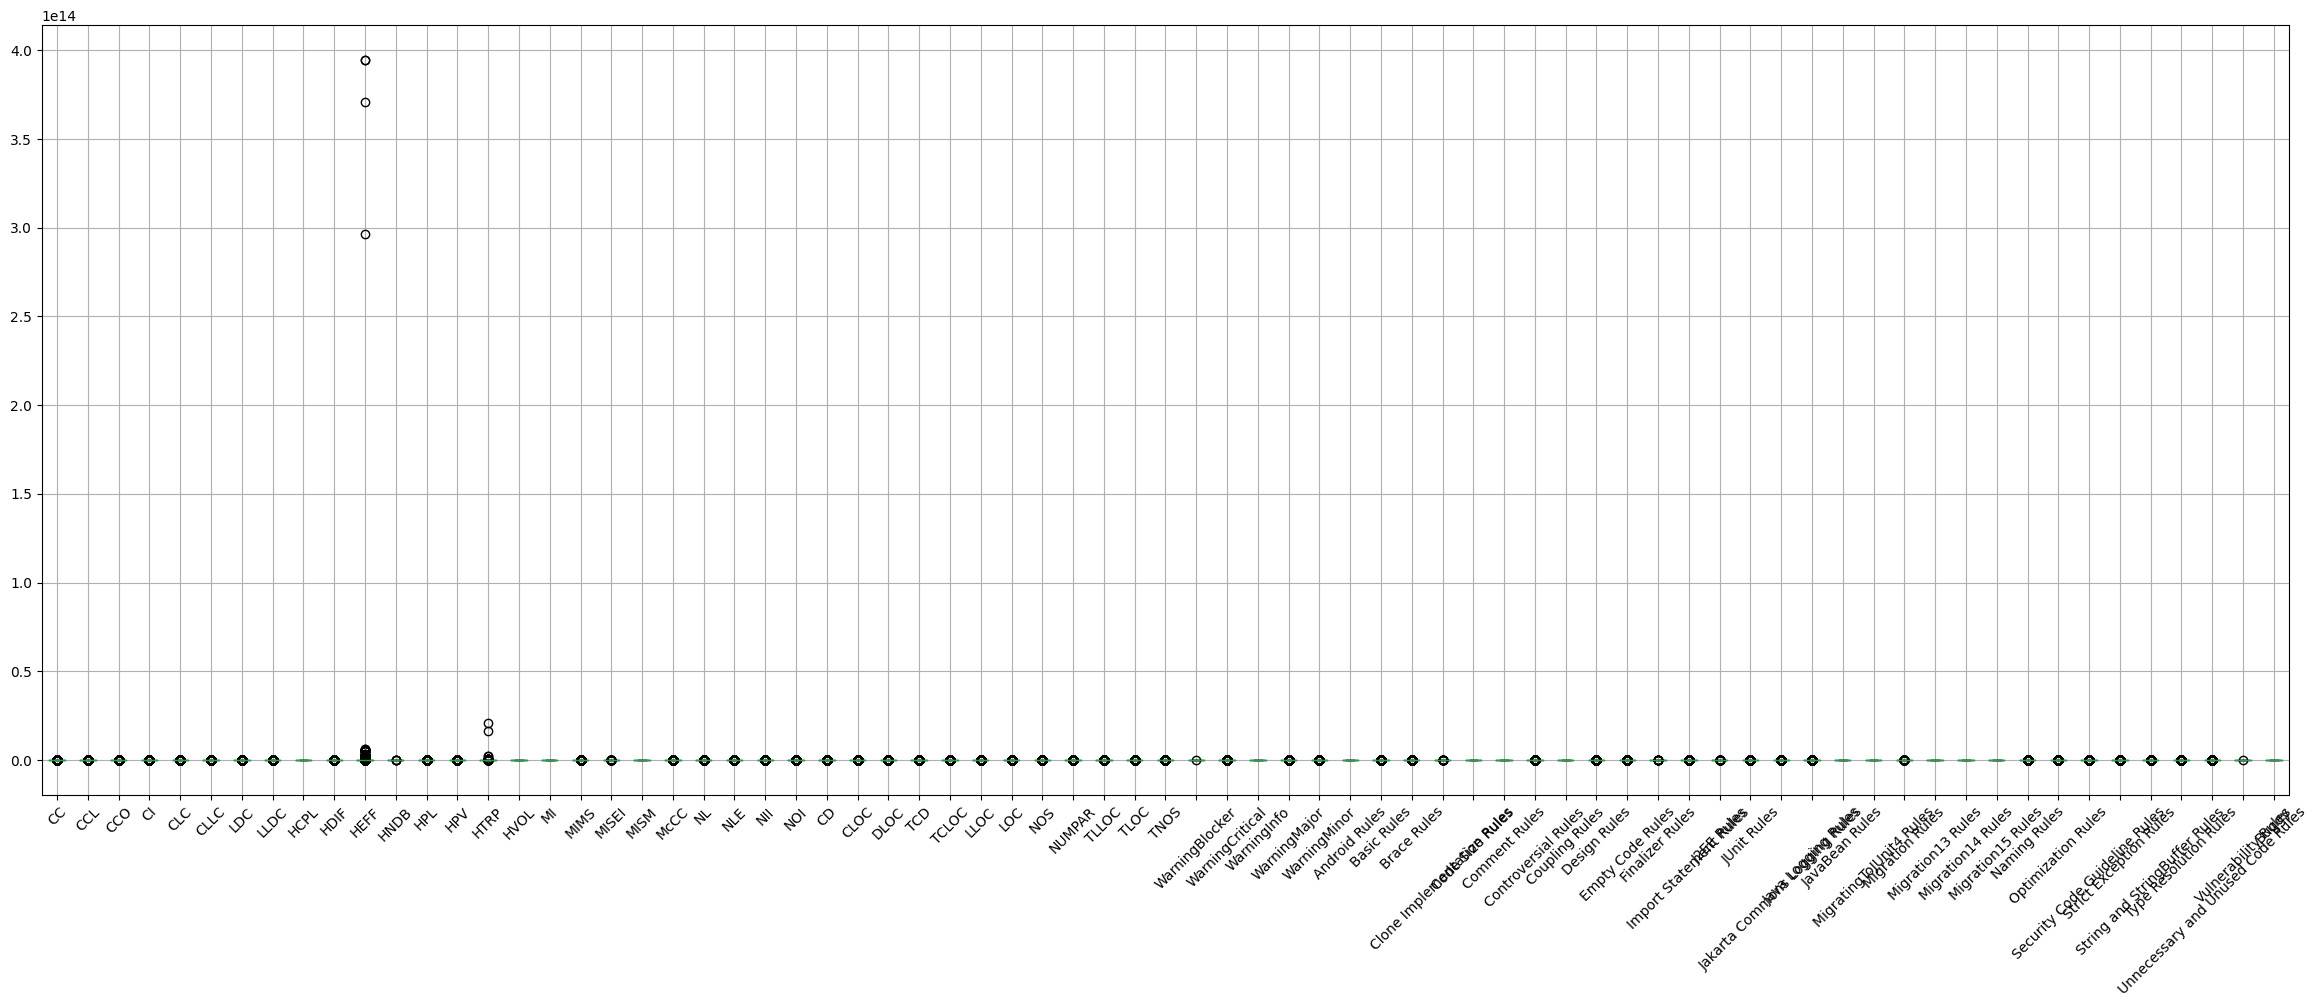

In [13]:
# Muestra de los valores atípicos para las features seleccionadas
plt.figure(figsize=(29,10))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

## Preparación de los conjuntos

In [14]:
# Separación de los valores de entrada para el entrenamiento del modelo y los valores de salida
x = df.drop('Buggy', axis=1)  # valores de entrada
y = df['Buggy']  # valores de salida

In [15]:
x

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,HCPL,HDIF,...,Migration14 Rules,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules
0,0,0,0,0,0,0,0,0,148093,163636,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,212183,248,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,299316,36,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,349426,4386,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,513541,536364,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108101,0,0,0,0,0,0,0,0,118039,33,...,0,0,0,0,0,0,0,0,0,0
108102,0,0,0,0,0,0,0,0,213303,308571,...,0,0,0,0,0,1,0,0,0,0
108103,0,0,0,0,0,0,0,0,247176,303947,...,0,0,0,0,0,1,0,0,0,0
108104,0,0,0,0,0,0,0,0,193219,368,...,0,0,0,0,0,1,0,0,0,0


In [16]:
y

0         1
1         1
2         1
3         1
4         1
         ..
108101    0
108102    0
108103    0
108104    0
108105    1
Name: Buggy, Length: 108001, dtype: int64

In [17]:
# Normalizacion de los datos del dataframe
# Se elimina la media de los datos y se escalan los datos para que su varianza sea 1 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
# División del dataframe en los conjuntos de test y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest Classifier

## Hiperparámetros y entrenamiento

![image.png](./img/Captura%20de%20pantalla%202023-05-06%20132600.png)

In [18]:
# Antes de la construcción del modelo de random forest comprobamos los mejores hiperparámetros para el modelo 
# Grid Search es una técnica de validación cruzada que ejecuta la combinación entre los parámetros introducidos como entrada para seleccionar la mejor combinación de estos 
# HIPERPARÁMETROS: 
#   - n_estimators: representa el número de estimadores (árboles de decisión en este caso) que se deben utilizar en el modelo
#   - max_depth: indica la profundidad máxima de los árboles del modelo 
#   - min_samples_split: determina el número de muestras requeridas para diidir un nodo en un árbol. Influye en la resistencia frente al ruido de los datos. 
#   - max_features: controla el número máximo de características que se consideran al buscar la mejor deisión en un nodo del árbol 
# PARÁMETROS: 
#   - cv: indica la estrategia de validación cruzada seguida 
#   - neg_root_mean_squared_error: error cuadrático medio expresado en su forma negativa 
#   - r2: indica cuanto se explica la variabilidad de los datos a través del modelo de regresión. Sus valores oscilan entre 0 y 1, siendo mejores cuanto más próximos a 1 se encuentren     
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 2022)

search_space = {
    "n_estimators": [300, 500, 800],
    "max_depth": [15, 35, 50],
    "min_samples_split": [3, 5],
    "max_features": [72, 75], 
}

GS = GridSearchCV(estimator = rf,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv = 5,
                 verbose = 4, 
                 n_jobs=-1)

#GS.fit(X_train, y_train)

#print(GS.best_params_)

In [21]:
# Creación del modelo de random forest con los hiperparámetros seleccionados del paso anterior
# rf = RandomForestClassifier(max_depth= 35, max_features= 20,min_samples_split= 50, n_estimators= 300)
# rf = RandomForestClassifier(max_depth= 35, max_features= 40, min_samples_split= 5, n_estimators= 500)
rf = RandomForestClassifier(max_depth= 35, max_features= 72, min_samples_split= 3, n_estimators= 500, n_jobs=-1)

In [22]:
# Entrenado del modelo de random forest
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=35, max_features=72, min_samples_split=3,
                       n_estimators=500, n_jobs=-1)

## Evaluación del modelo

### Accuracy Score

In [34]:
# Comprobación de las predicciones realizadas con el modelo de random forest
y_pred = rf.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print('Accuracy Score: {:.2f} %'.format(precision * 100))
predicciones_correctas = accuracy_score(y_test, y_pred, normalize=False)
print('Predicciones correctas: {}'.format(predicciones_correctas))

Accuracy Score: 75.71 %
Predicciones correctas: 16354


### Confusion Matrix
Una confusion matrix es una forma de expresar cuántas predicciones de un clasificador fueron correctas y, cuando son incorrectas, dónde el clasificador se confundió (de ahí el nombre). En las matrices de confusión a continuación, las filas representan las etiquetas verdaderas y las columnas representan las etiquetas predichas. Los valores en la diagonal representan el número (o porcentaje, en una matriz de confusión normalizada) de veces en que la etiqueta predicha coincide con la etiqueta verdadera. Los valores en las otras celdas representan instancias donde el clasificador etiquetó incorrectamente una observación; la columna nos dice qué predijo el clasificador y la fila nos dice cuál era la etiqueta correcta. Esta es una forma conveniente de identificar áreas donde el modelo puede necesitar un poco de entrenamiento adicional.

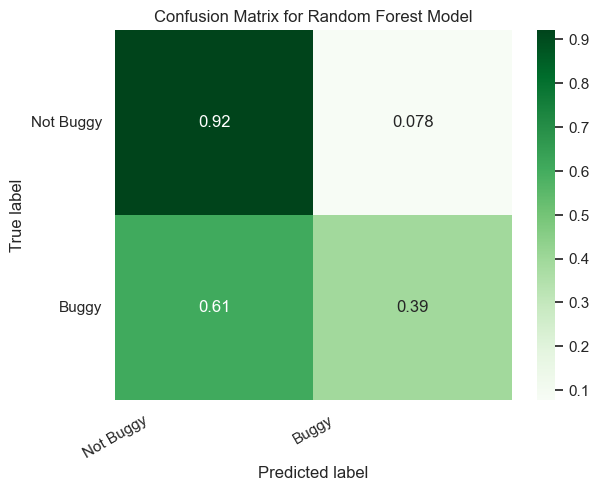

In [32]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Confusion matrix usando un heat map
sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Greens)

# Labels 
class_names = ['Not Buggy', 'Buggy']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=30)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

#### Precision
Precision es el número de miembros de una clase que el modelo ha identificado correctamente dividido entre todas las veces que el modelo ha predicho esa clase.
#### Recall
La sensibilidad o recall es el número de miembros de una clase que el clasificador identificó correctamente dividido por el número total de miembros en esa clase.
#### F1 score
El F1 score es un poco menos intuitivo porque combina precisión y recall en una sola métrica. Si tanto la precisión como el recall son altos, F1 también será alto. Si ambos son bajos, F1 será bajo. Si uno es alto y el otro bajo, F1 será bajo. F1 es una forma rápida de saber si el clasificador es realmente bueno para identificar miembros de una clase, o si está encontrando atajos (por ejemplo, simplemente identificando todo como miembro de una clase grande).

In [35]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     14851
           1       0.70      0.39      0.50      6750

    accuracy                           0.76     21601
   macro avg       0.73      0.66      0.67     21601
weighted avg       0.75      0.76      0.73     21601



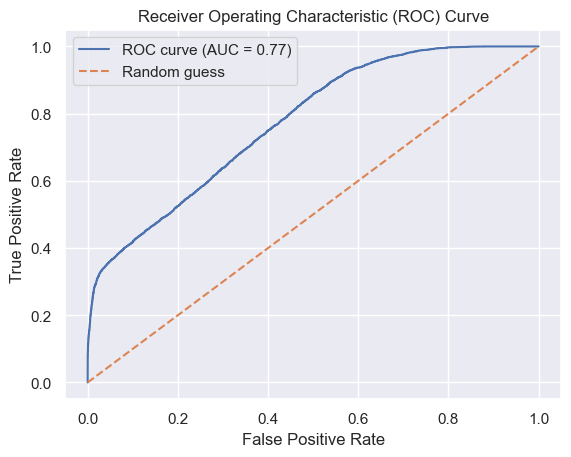

In [36]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()

## Importancia de las features

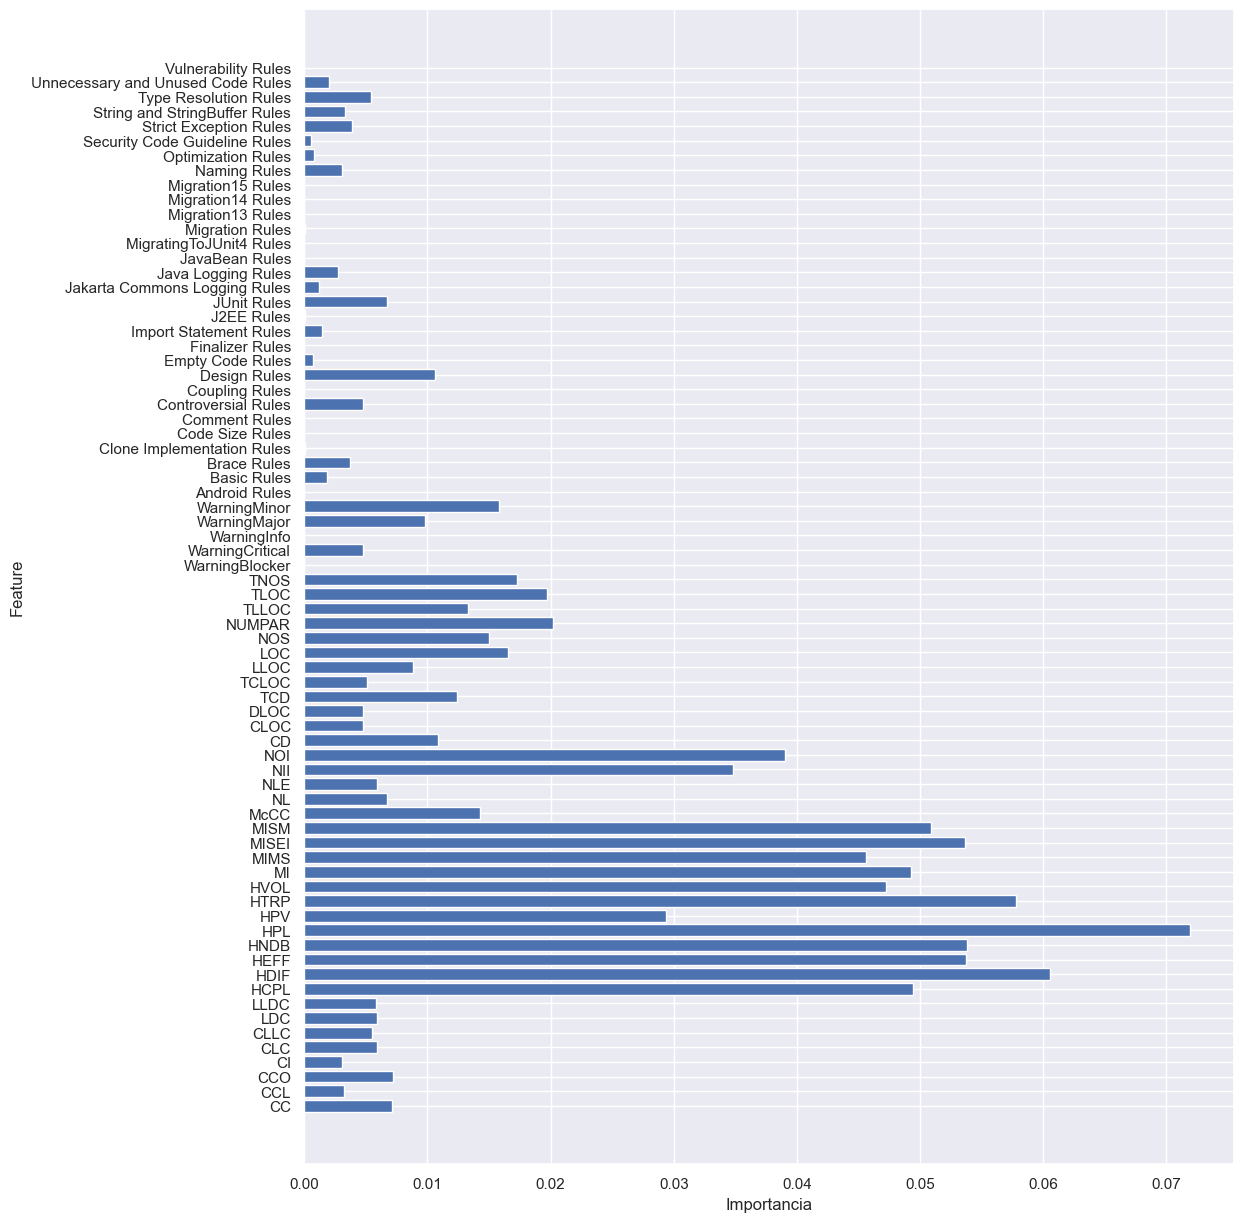

[0.007162273505495772, 0.0032580500147656876, 0.00718993108585836, 0.0030433006061801435, 0.005946207795710911, 0.005506776928750859, 0.0059221657425856675, 0.005798743208831884, 0.04941750245569603, 0.06056477256495777, 0.05375130760682568, 0.05382960192865901, 0.07191168505214927, 0.029342886300898274, 0.057795133541732886, 0.04723742768048234, 0.04925026855798654, 0.045593937706311524, 0.05363544081013776, 0.050914230505855376, 0.014269469974941834, 0.00674131750675866, 0.005914720412249433, 0.03477465620087058, 0.03902973726052667, 0.010836583471796422, 0.0048025557729431505, 0.004742920982043498, 0.012422395017866962, 0.00513437054148417, 0.008828589128321745, 0.016531631664938026, 0.014984438721205131, 0.020186913366483268, 0.013290326002114461, 0.019740693522720013, 0.01726770750332659, 0.0, 0.004763741152969518, 0.0, 0.009831837157808554, 0.015806947888448913, 0.0, 0.001873452228396684, 0.0037533651858810955, 2.198007559247248e-05, 0.0, 0.0, 0.004765122829405307, 0.0, 0.0105844

In [107]:
# Importancia de las features sobre el modelo random forest
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
fig, ax = plt.subplots(figsize=(12,15))
ax.barh(range(len(rf.feature_importances_)), rf.feature_importances_)
ax.set_yticks(range(len(x.columns)))
ax.set_yticklabels(x.columns)
ax.set_xlabel("Importancia")
ax.set_ylabel("Feature")
plt.show()
importances = list(rf.feature_importances_)
print(importances)
print(x.columns)

In [136]:
# features = pd.get_dummies(x.columns)
feature_list = list(x.columns)
# feature_list2 = list(x.columns)
# x.columns
# features
# feature_list
# feature_list2

<Axes: >

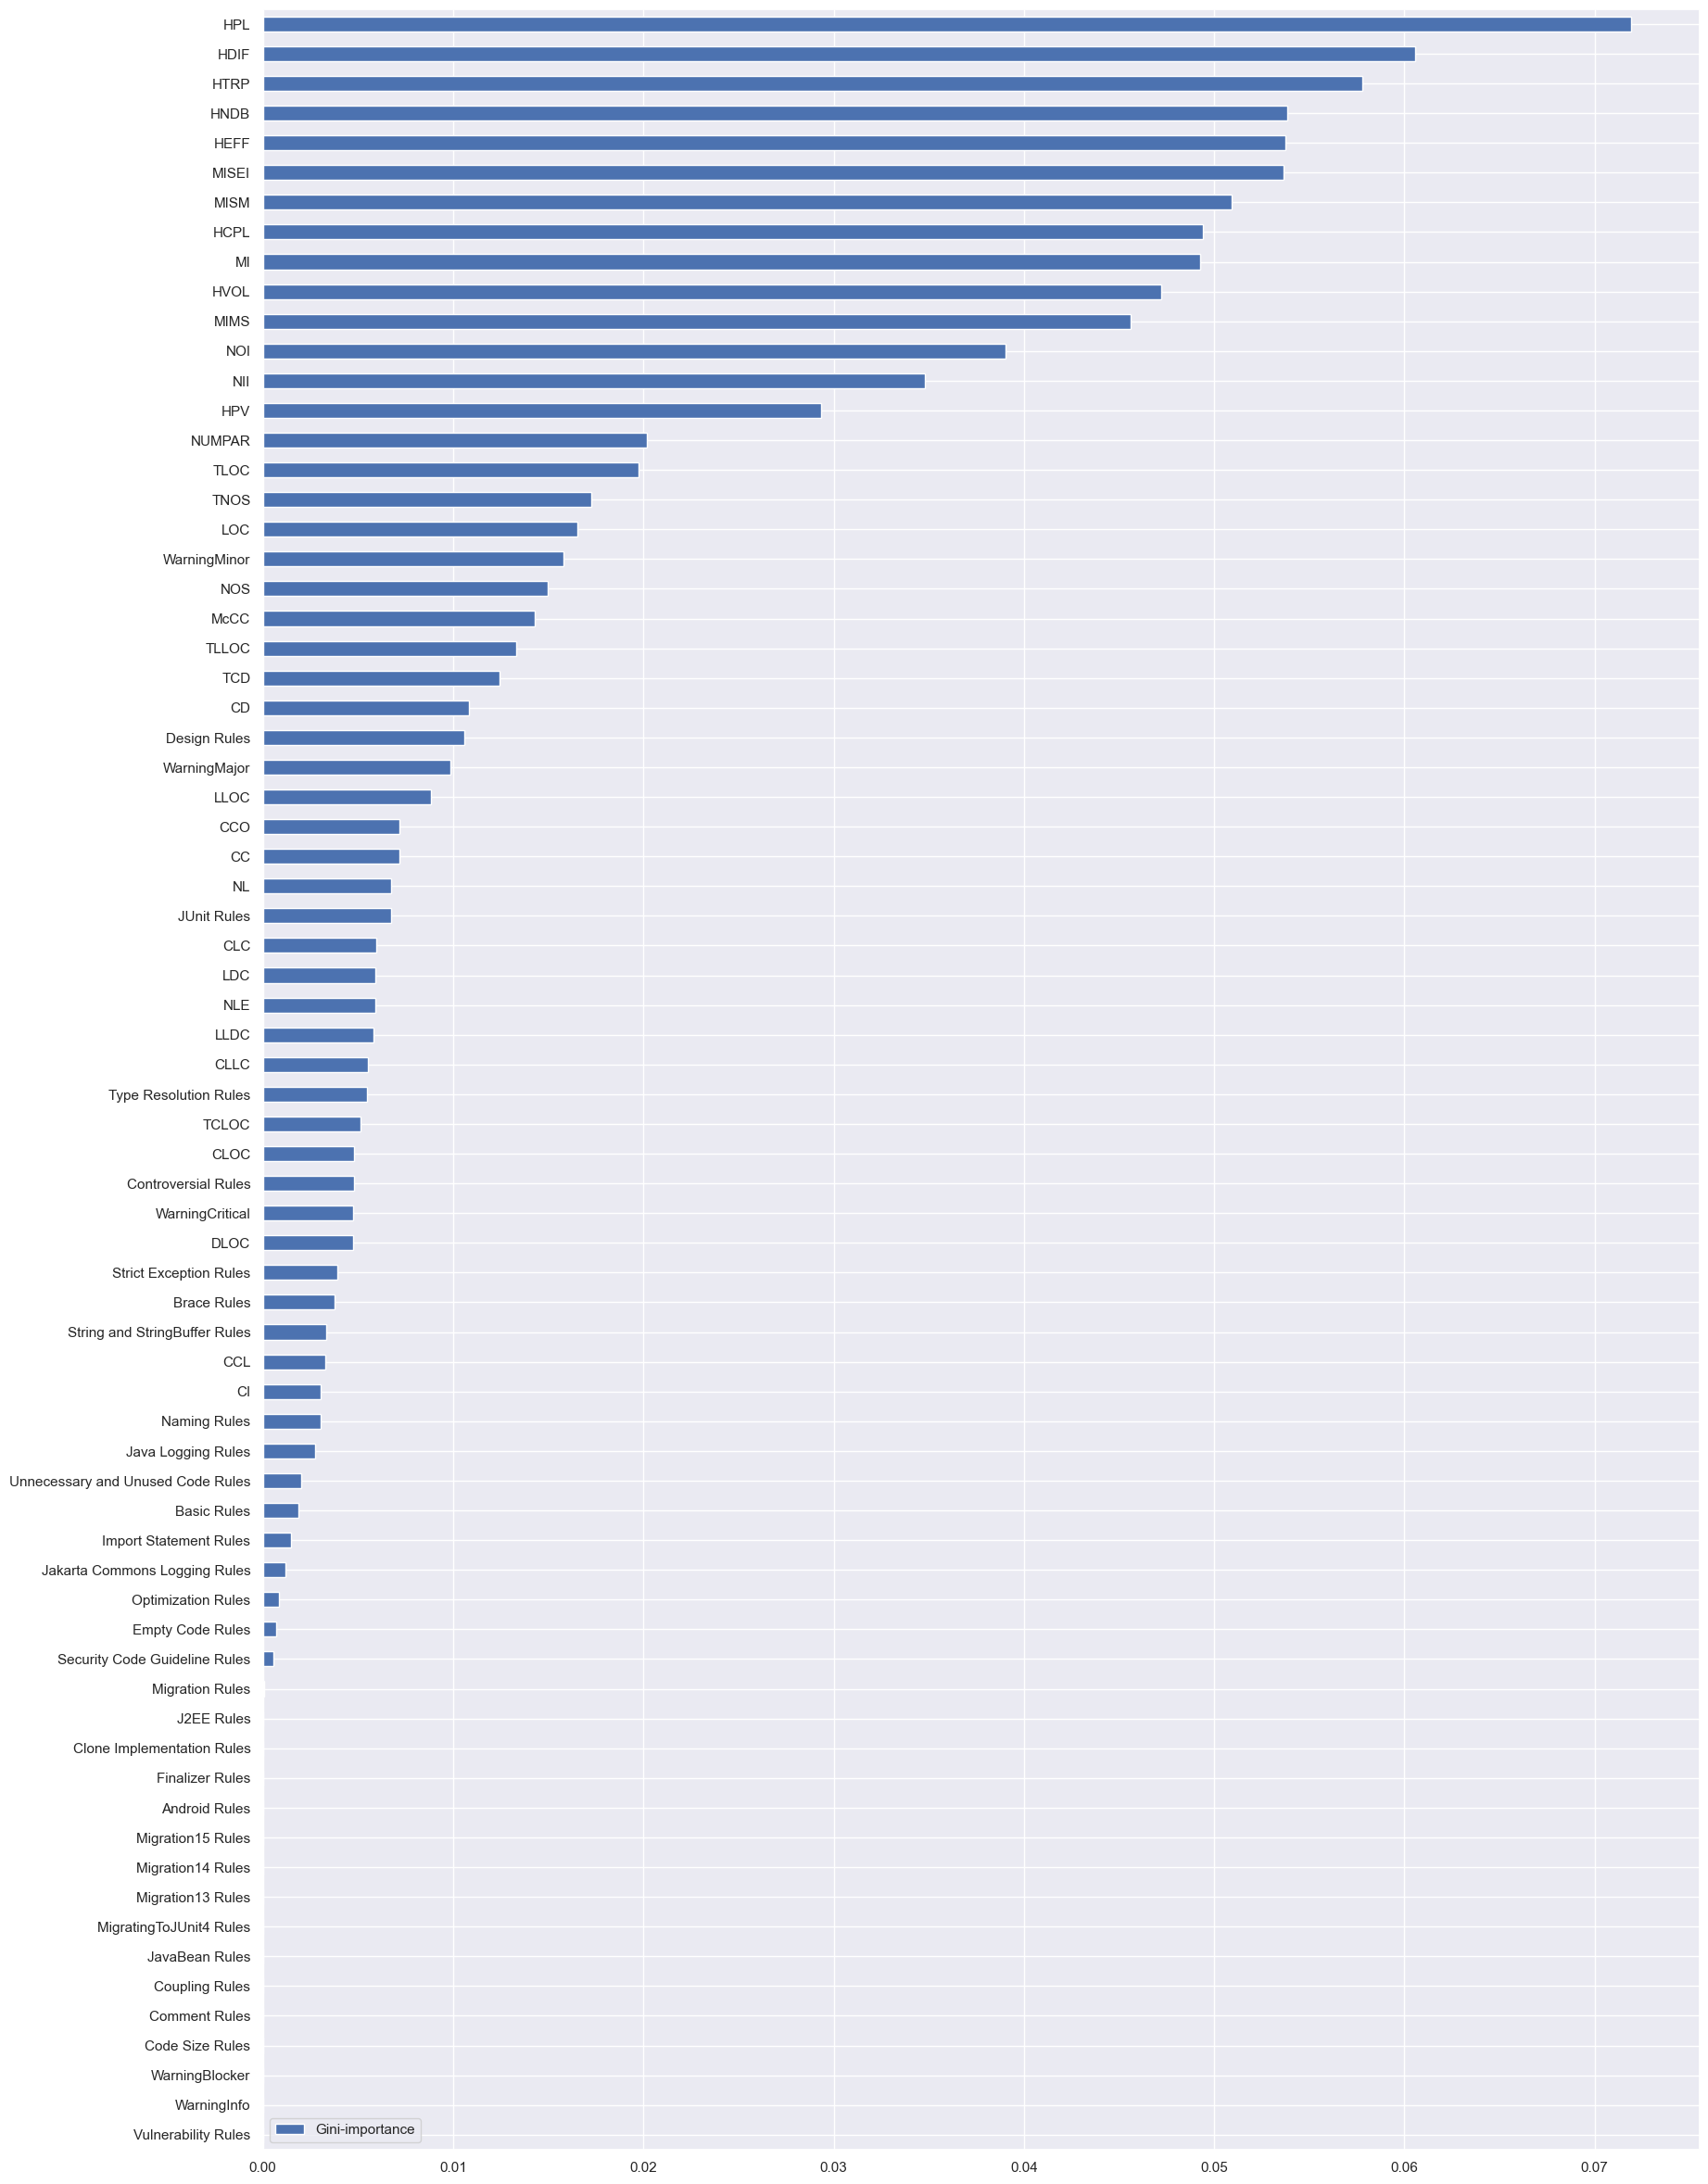

In [137]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='barh', figsize = (20,30))

In [138]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: HPL                  Importance: 0.07191168505214927
Variable: HDIF                 Importance: 0.06056477256495777
Variable: HTRP                 Importance: 0.057795133541732886
Variable: HNDB                 Importance: 0.05382960192865901
Variable: HEFF                 Importance: 0.05375130760682568
Variable: MISEI                Importance: 0.05363544081013776
Variable: MISM                 Importance: 0.050914230505855376
Variable: HCPL                 Importance: 0.04941750245569603
Variable: MI                   Importance: 0.04925026855798654
Variable: HVOL                 Importance: 0.04723742768048234
Variable: MIMS                 Importance: 0.045593937706311524
Variable: NOI                  Importance: 0.03902973726052667
Variable: NII                  Importance: 0.03477465620087058
Variable: HPV                  Importance: 0.029342886300898274
Variable: NUMPAR               Importance: 0.020186913366483268
Variable: TLOC                 Importance: 0.01974

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

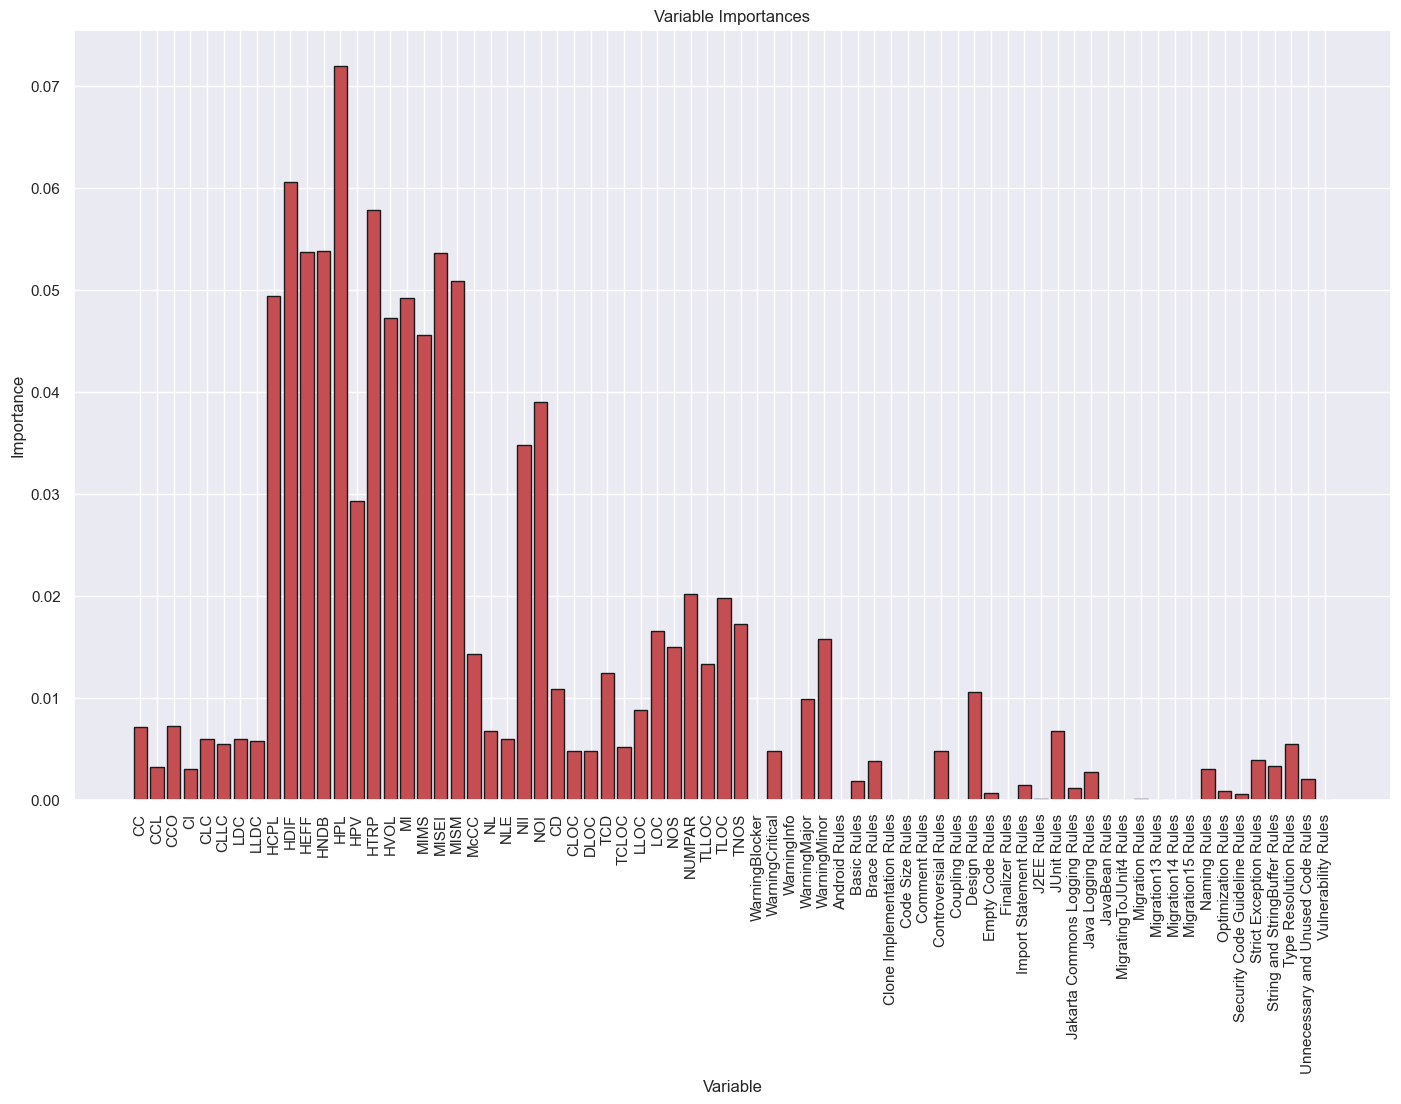

In [139]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize = (17,10))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [141]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 39


In [144]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:34]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
print(important_indices)
# Create training and testing sets with only the important features
important_train_features = X_train[:, important_indices]
important_test_features = X_test[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

[12, 9, 14, 11, 10, 18, 19, 8, 16, 15, 17, 24, 23, 13, 33, 35, 36, 31, 41, 32, 20, 34, 28, 25, 50, 40, 30, 2, 0, 21, 55, 4, 6, 22]


InvalidIndexError: (slice(None, None, None), [12, 9, 14, 11, 10, 18, 19, 8, 16, 15, 17, 24, 23, 13, 33, 35, 36, 31, 41, 32, 20, 34, 28, 25, 50, 40, 30, 2, 0, 21, 55, 4, 6, 22])

In [22]:
entry_to_explain = 5

# Shap

In [23]:
import shap
import joblib
shap_explainer = shap.TreeExplainer(rf)
shap.initjs()

c:\Users\david\Desktop\bug prediction explanation\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


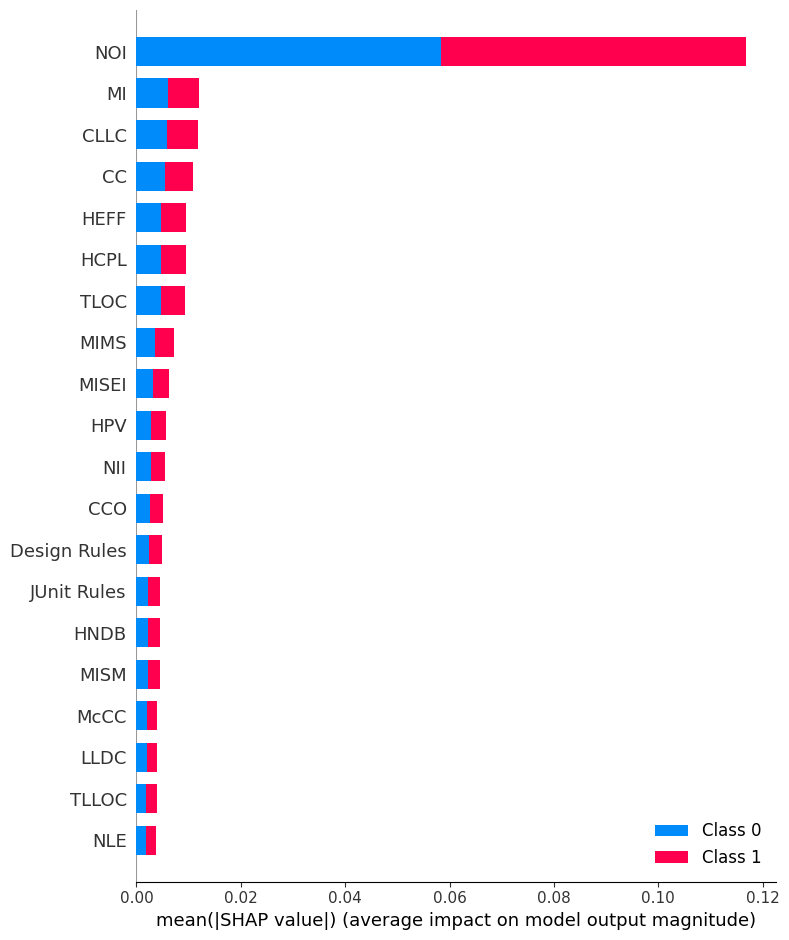

In [24]:
# Plot de resumen global 
# Para hacer el plot del conjunto total habría que ejectuar la siguiente instrucción: 
# shap.summary_plot(shap_explainer.shap_values(X_test), X_test, plot_type="bar")

shap.summary_plot(shap_explainer.shap_values(X_test.iloc[entry_to_explain-1:entry_to_explain,:]), X_test, plot_type="bar")

In [70]:
# Plots para SHAP 
# entry_to_explain = 5
# entry_to_explain = 23
# entry_to_explain = 30
# entry_to_explain = 47
# entry_to_explain = 70
entry_to_explain = 95
print(f'PROBABILIDADES:\n\tNO BUGGY: {rf.predict_proba(X_test)[entry_to_explain, 0]}\n\tBUGGY: {rf.predict_proba(X_test)[entry_to_explain, 1]}')

shap_values = shap_explainer.shap_values(np.array(X_test.iloc[entry_to_explain]))
shap.force_plot(shap_explainer.expected_value[1], shap_values[1], X_test.iloc[entry_to_explain])

PROBABILIDADES:
	NO BUGGY: 0.5525724315244805
	BUGGY: 0.44742756847551923


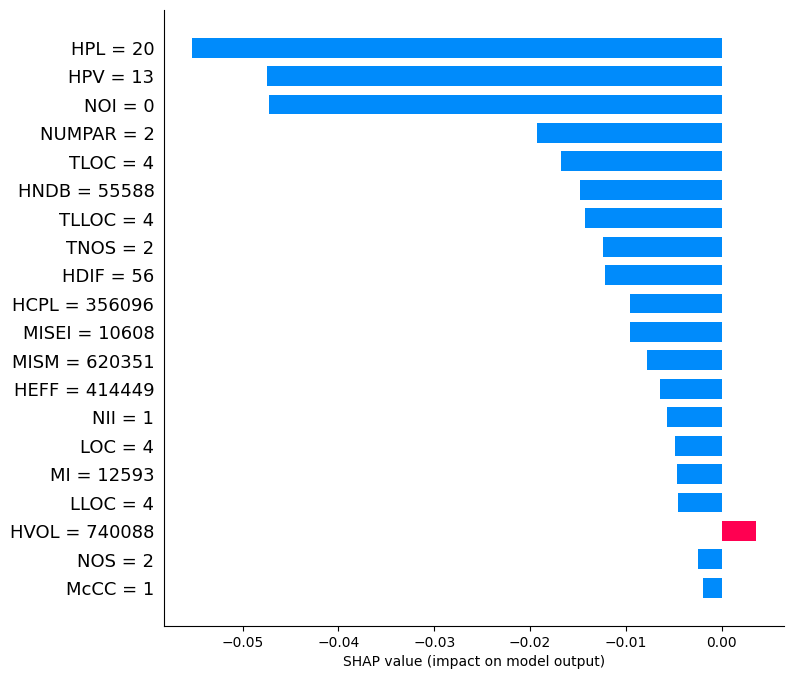

In [63]:
plt.figure(figsize=(8,8))
shap.bar_plot(shap_values[1], features=X_test.iloc[entry_to_explain], max_display=20)

In [64]:
def shap_force_plot(data:pd.DataFrame, exp:shap.TreeExplainer, x:int): 
    for i in range(x): 
        sv = exp.shap_values(np.array(data.iloc[i]))
        shap.force_plot(exp.expected_value[1], sv[1], data.iloc[i], matplotlib=True, show=False)
        plt.savefig(f"./img/shap/{i}_force.png", dpi=200, bbox_inches='tight')
        plt.clf()

def shap_bar_plot(data:pd.DataFrame, exp:shap.TreeExplainer, x:int): 
    plt.figure(figsize=(8,8))
    for i in range(x): 
        sv = exp.shap_values(np.array(data.iloc[i]))
        shap.bar_plot(sv[1], features=data.iloc[i], max_display=20, show=False)
        plt.savefig(f"./img/shap/{i}_bar.png", bbox_inches='tight')
        plt.clf()

shap_force_plot(data=X_test, exp=shap_explainer, x=100)
shap_bar_plot(data=X_test, exp=shap_explainer, x=100)

# Lime

In [27]:
import lime
import lime.lime_tabular
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, 
                            feature_names=X_test, discretize_continuous=True)
# exp = explainer.explain_instance(entry_to_explain, rf.predict_proba, num_features=len(X_train.columns), top_labels=1)
exp = lime_explainer.explain_instance(entry_to_explain, rf.predict_proba, num_features=10, top_labels=1)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [28]:
exp.show_in_notebook(show_table=True, show_all=False)

In [29]:
def lime_explain(X_test:pd.DataFrame, explainer:lime.lime_tabular.LimeTabularExplainer, rf:RandomForestClassifier , x:int): 
    for i in range(x): 
        exp = explainer.explain_instance(X_test.iloc[i], rf.predict_proba, num_features=10, top_labels=1)
        exp.save_to_file(f"./img/lime/{i}.html")

# lime_explain(X_test=X_test, explainer=lime_explainer,rf = rf, x=100)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

KeyboardInterrupt: 

In [30]:
probabilities = rf.predict_proba(X_test)
print(f"Probabilities: \n5: {probabilities[5]}\n23: {probabilities[23]}\n30: {probabilities[30]}\n47: {probabilities[47]}\n70: {probabilities[70]}\n95: {probabilities[95]}")

Probabilities: 
5: [0.84801542 0.15198458]
23: [0.75714867 0.24285133]
30: [0.96340742 0.03659258]
47: [0.57602563 0.42397437]
70: [0.49713833 0.50286167]
95: [0.56362203 0.43637797]


## Tree schemas
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

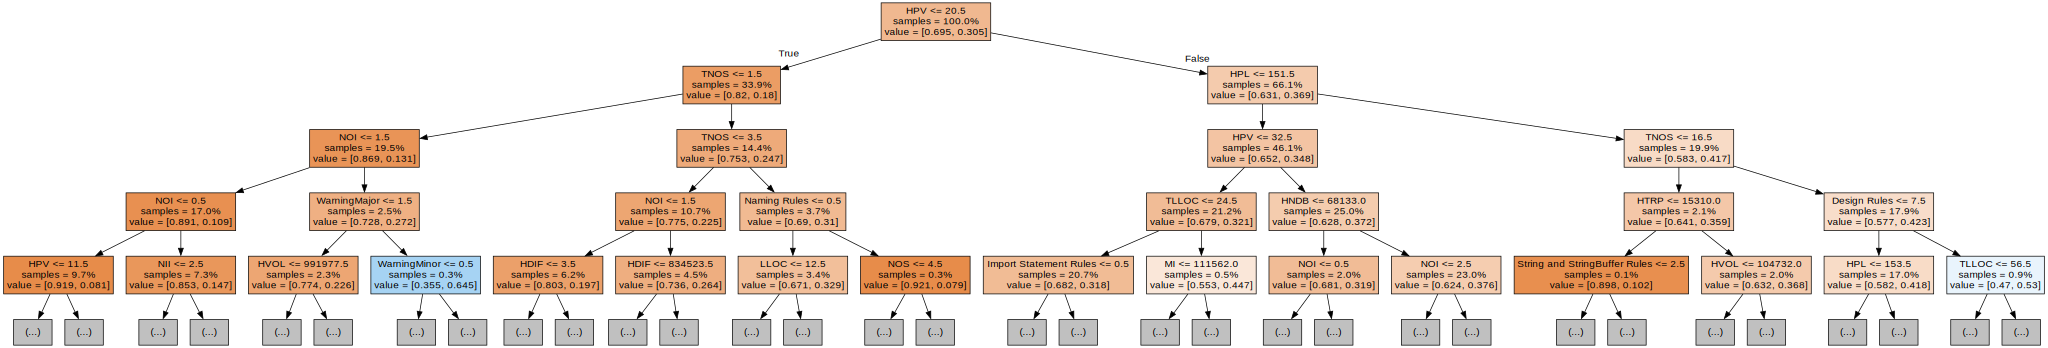

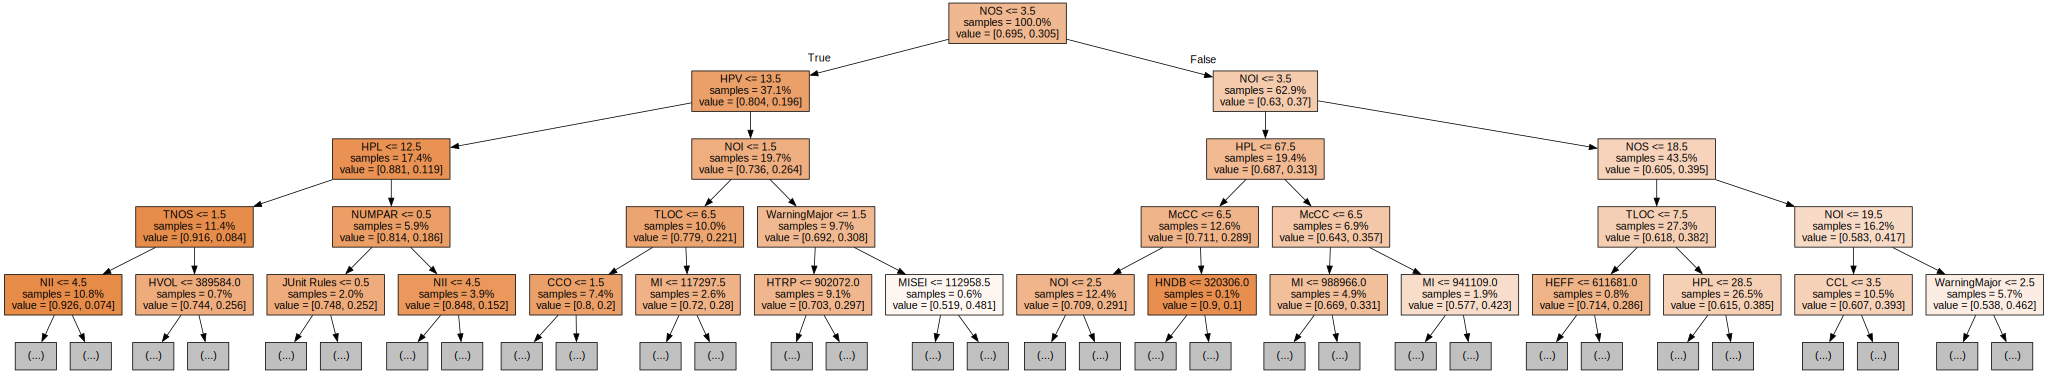

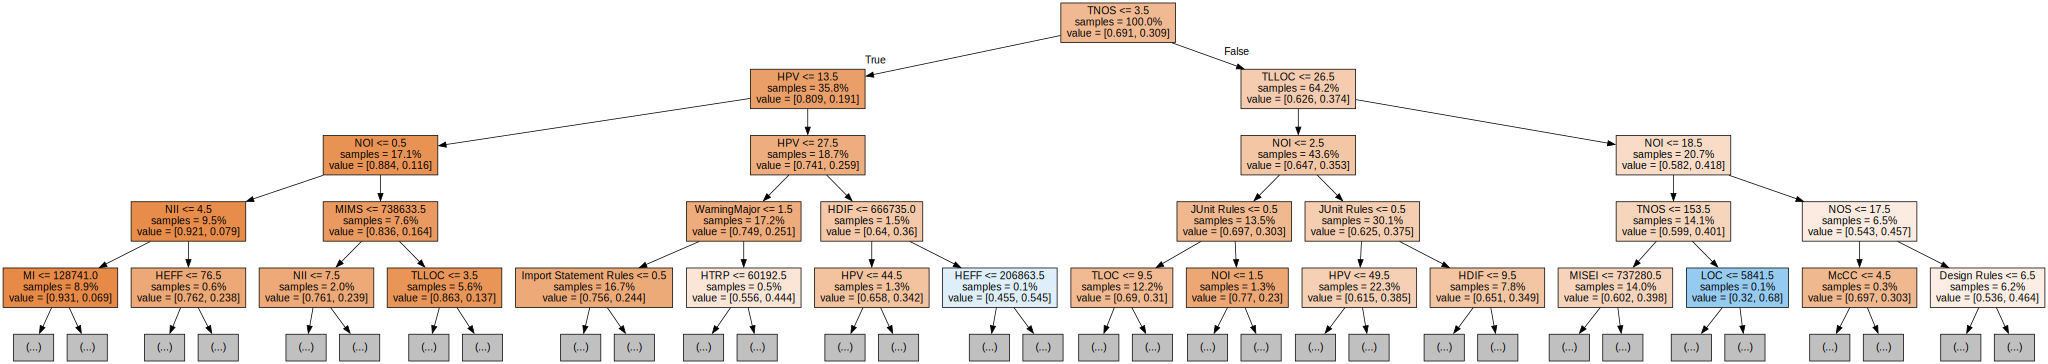

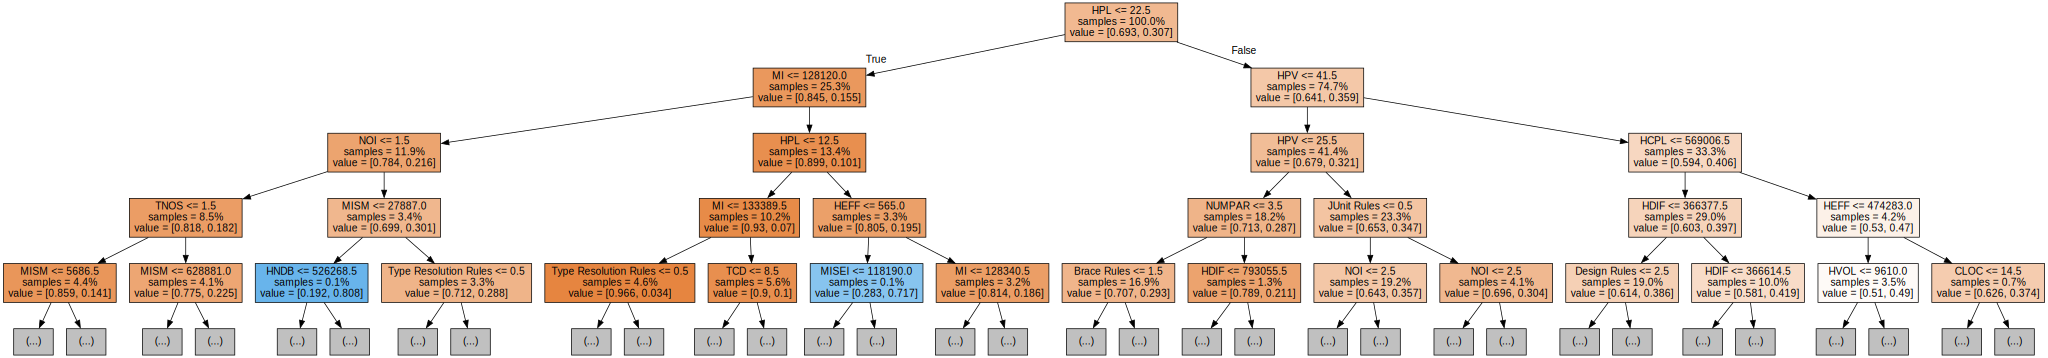

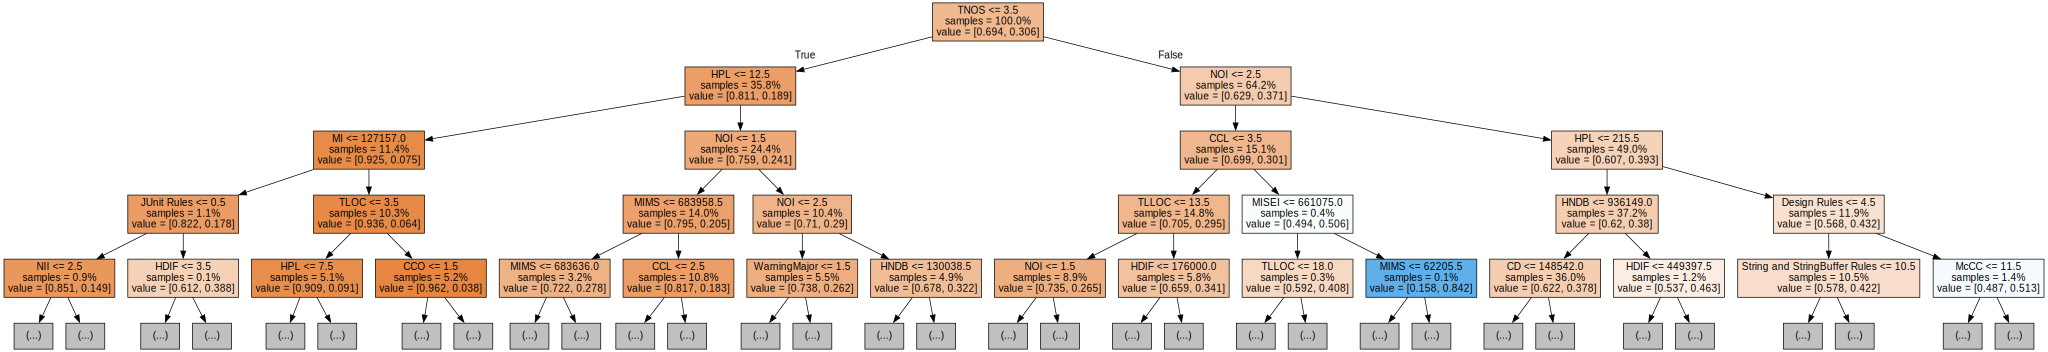

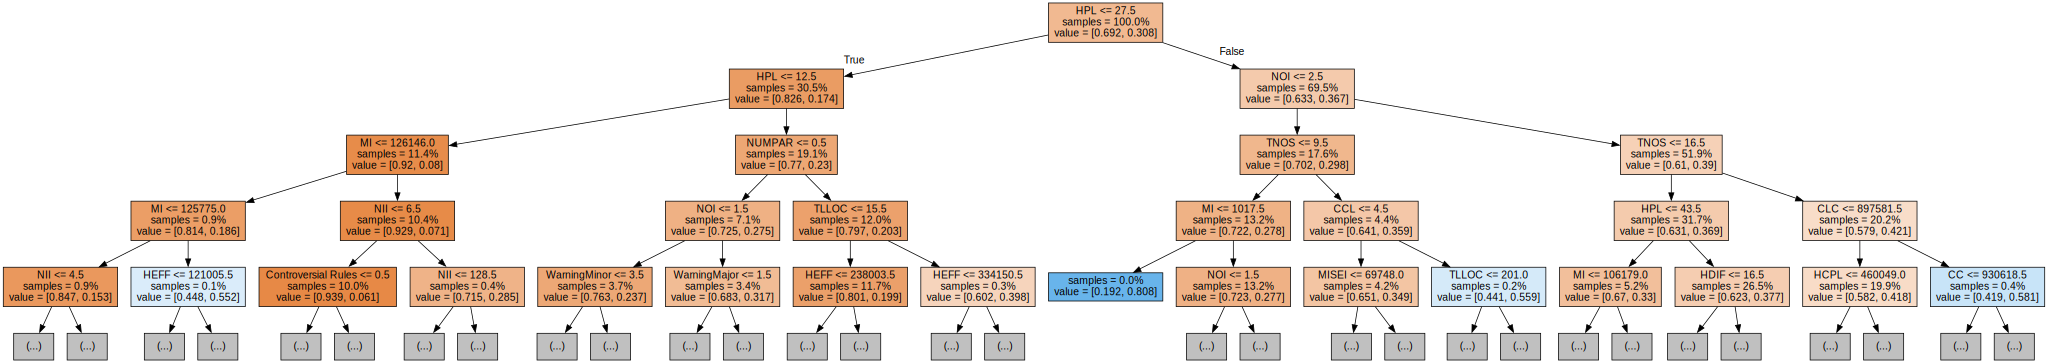

In [35]:
# Ejectura esta parte si está instalado graphviz en el equipo
# from sklearn.tree import export_graphviz
# import graphviz
# for i in [5, 23, 30, 47, 70, 95]:
#     tree = rf.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,  
#                                filled=True,  
#                                max_depth=4, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     graph.render(filename=f'g1.dot')
#     display(graph)

# XGBoost

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2022)

search_space = {
    "n_estimators": [100,300],
    "max_depth": [3,7],
    "min_samples_split": [25, 50],
    "max_features": [2,4]
}

GS = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ["r2", "neg_root_mean_squared_error"],
                 refit = "r2",
                 cv = 5,
                 verbose = 4)

GS.fit(X_train, y_train)

print(GS.best_params_)

In [31]:
# Definición del modelo XGBoost
model = xgb.XGBClassifier()

# Entrenamos el modelo
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [32]:
# Comprobamos la precisión en las predicciones del modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Precisión: {:.2f}%'.format(accuracy * 100))


Precisión: 70.08%


# XGBoost with GPU usage

In [57]:
# Definimos el modelo para actuar con el procesado pro GPU
xgb_gpu = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

# Entrenamos el modelo
xgb_gpu.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
y_pred = xgb_gpu.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 70.16%
